# Projekt

### Spis treści 
<a id="spis"></a>

1. [Generator zbiorow](#generator)
2. [Wybor zbiorow](#ustalenieZbiorow)
3. [Wizualizacja dla algorytmu Jarvisa](#jarvis)

    - [Jarvis dla zbioru typu a](#jarvisa)
    - [Jarvis dla zbioru typu b](#jarvisb)
    - [Jarvis dla zbioru typu c](#jarvisc)
    - [Jarvis dla zbioru typu d](#jarvisd)
    
4. [Wizualizacja dla algorytmu Grahama](#graham)

    - [Graham dla zbioru typu a](#grahama)
    - [Graham dla zbioru typu b](#grahamb)
    - [Graham dla zbioru typu c](#grahamc)
    - [Graham dla zbioru typu d](#grahamd)
    
5. [Wizualizacja dla algorytmu Gorna-dolna](#goradol)

    - [Gorna-dolna dla zbioru typu a](#goradola)
    - [Gorna-dolna dla zbioru typu b](#goradolb)
    - [Gorna-dolna dla zbioru typu c](#goradolc)
    - [Gorna-dolna dla zbioru typu d](#goradold)
    
6. [Wizualizacja dla algorytmu Przyrostowego](#przyrost)

    - [Przyrostowy dla zbioru typu a](#przyrosta)
    - [Przyrostowy dla zbioru typu b](#przyrostb)
    - [Przyrostowy dla zbioru typu c](#przyrostc)
    - [Przyrostowy dla zbioru typu d](#przyrostd)
    
7. [Wizualizacja dla algorytmu Dziel i zwyciezaj](#dziel)
    - [Dziel i zwyciezaj dla zbioru typu a](#dziela)
    - [Dziel i zwyciezaj dla zbioru typu b](#dzielb)
    - [Dziel i zwyciezaj dla zbioru typu c](#dzielc)
    - [Dziel i zwyciezaj dla zbioru typu d](#dzield)
    
8. [Wizualizacja dla algorytmu Chana](#chan)
    - [Chan dla zbioru typu a](#chana)
    - [Chan dla zbioru typu b](#chanb)
    - [Chan dla zbioru typu c](#chanc)
    - [Chan dla zbioru typu d](#chand)
    
9. [Wizualizacja dla algorytmu Quick hull](#quickhull)
    - [Quick hull dla zbioru typu a](#quickhulla)
    - [Quick hull dla zbioru typu b](#quickhullb)
    - [Quick hull dla zbioru typu c](#quickhullc)
    - [Quick hull dla zbioru typu d](#quickhulld)


<a id='section_id'></a>

### Importy
<a id="konfiguracja"></a>

<a id='section_id'></a>

In [1]:
from lib import *
import numpy as np
from vis.divide_conq_vis import divide_conq_vis
from vis.graham_vis import *
from vis.increase_vis import *
from vis.divide_conq_vis import *
from vis.jarvis_vis import *
from vis.lowerupper_vis import *
from vis.chan_vis import *
from vis.quickhull_vis import *
# Funkcje wizualizujące Łukasza

# wypisywanie otoczek w czytelnej formie
from pprint import pprint
from copy import deepcopy

<a id='section_id'></a>

# Utilities


<a id='section_id'></a>

# Genertor zbiorów punktów

<a id="generator"></a>
[spis treści](#spis)

<a id='section_id'></a>

<a id='section_id'></a>

In [2]:
import random 
import math
def makeAset(n,x1=-100,y1=100,x2=-100,y2=100):
    return [(random.randint(x1,y1), random.randint(x2,y2)) for i in range(n)]

def makeBset(n,xs=0,ys=0,r=100):
    b = []
    for _ in range(n):
        t = random.random() * (2*math.pi)
        b.append((r*math.sin(t)-xs, r*math.cos(t)-ys))
    return b
        
def makeCset(n,x1=-100,y1=-100,x2=100,y2=-100,x3=100,y3=100,x4=-100,y4=100): # wierzcholki musza byc podawane 
# kolejno w przeciwnym kierunku do ruchu wskazowek 
# zegara makeCset tworzy wszelakie czworokaty, bioirac pod uwage ze prostokaty moglyby byc przechylone wyznaczanie zbiorow
# punktow dla nich bylo by rownie trudne
    C=[]
    a=np.sqrt((x1-x2)**2+(y1-y2)**2)
    b=np.sqrt((x2-x3)**2+(y2-y3)**2)
    c=np.sqrt((x3-x4)**2+(y3-y4)**2)
    d=np.sqrt((x1-x4)**2+(y1-y4)**2)
    obw=a+b+c+d
    s=random.random()*obw

    for _ in range(n):
        s =random.random() * obw
        if s<=a:
            C.append(((x1+(s/a)*(x2-x1),y1+(y2-y1)*(s/a))))
        elif s<=a+b:
            C.append((x2+(x3-x2)*((s-a)/b),y2+(y3-y2)*((s-a)/b)))
        elif s<=a+b+c:
            C.append((x3+(x4-x3)*((s-a-b)/c),y3+(y4-y3)*((s-b-a)/c)))
        else:
            C.append((x4+(x1-x4)*((s-a-b-c)/d),y4+(y1-y4)*((s-b-a-c)/d)))
    return C

def makeDset(x1=0,y1=0,x2=10,y2=0,x3=10,y3=10,x4=0,y4=10,n1=100,n2=100,n=0):
    if(n!=0):
        n1=n
        n2=n
    D=[]
    D.append((x1,y1))
    D.append((x2,y2))
    D.append((x3,y3))
    D.append((x4,y4))
    a=np.sqrt((x2-x1)**2+(y2-y1)**2)
    d=np.sqrt((x3-x1)**2+(y3-y1)**2)
    
    for _ in range(n1):
        s=random.random()*a
        D.append((x1+(x2-x1)*(s/a),y1+(y2-y1)*(s/a)))
        D.append((x4+(x1-x4)*(s/a),y4+(y1-y4)*(s/a)))
    for _ in range(n2):
        s=random.random()*d
        D.append((x1+(x3-x1)*(s/d),y1+(y3-y1)*(s/d)))
        D.append((x2+(x4-x2)*(s/d),y2+(y4-y2)*(s/d)))
    return D   

<a id='section_id'></a>

## Wybor zbiorow

<a id="ustalenieZbiorow"></a>
[spis treści](#spis)


In [3]:
a=makeAset(n=30)
b=makeBset(n=100)
c=makeCset(n=100)
d=makeDset(n=100)

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja Wizualizacji

<a id="wizualizacja"></a>


<a id='section_id'></a>

## Algorytm Jarvisa

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Jarvis - wizualizacja dla chmury punktów

<a id="jarvisa"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
array([[  70, -100],
       [  97,  -54],
       [  97,   33],
       [  94,   93],
       [ -69,  100],
       [ -89,   87],
       [ -96,  -48],
       [ -92,  -97]])


<IPython.core.display.Javascript object>


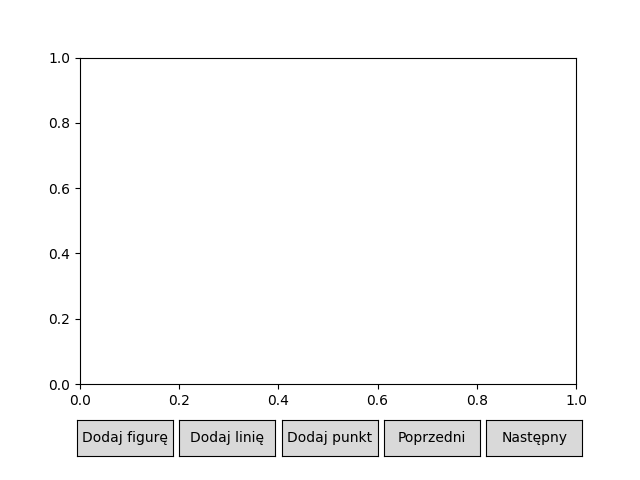

In [4]:
%matplotlib notebook

ch, plot=jarvis_vis(np.array(a))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie kołowym

<a id="jarvisb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
array([[  3.93207545, -99.92266401],
       [  9.68782709, -99.52962376],
       [ 21.08233394, -97.75241785],
       [ 22.57546519, -97.41841906],
       [ 26.82407509, -96.33519085],
       [ 41.20952304, -91.114078  ],
       [ 45.8264068 , -88.88160912],
       [ 56.26216993, -82.67144752],
       [ 62.73830258, -77.87108185],
       [ 63.55203152, -77.20841463],
       [ 70.22800308, -71.19008065],
       [ 71.77031704, -69.63491647],
       [ 77.02708608, -63.77168659],
       [ 79.86736304, -60.17644323],
       [ 81.88709723, -57.39776396],
       [ 86.38943831, -50.3673004 ],
       [ 92.9256214 , -36.94359062],
       [ 96.49299869, -26.25073719],
       [ 98.23776067, -18.69070301],
       [ 99.1792697 , -12.78563494],
       [ 99.64372726,  -8.43371908],
       [ 99.68194099,  -7.96935634],
       [ 99.85817882,  -5.32391985],
       [ 99.97080824,  -2.41609174],
       [ 99.99867287,  -0.51519244],
       [ 99.99981495,   0.19237

<IPython.core.display.Javascript object>


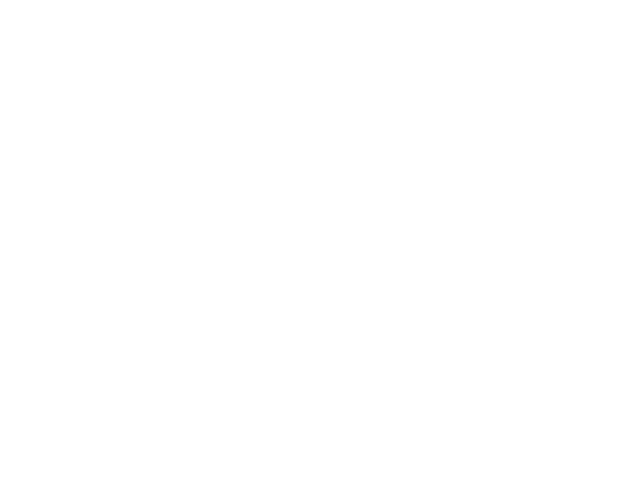

In [5]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(b))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="jarvisc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
array([[ -98.59823461, -100.        ],
       [  79.79040374, -100.        ],
       [ 100.        ,  -97.60758567],
       [ 100.        ,   96.22282589],
       [  95.96401106,  100.        ],
       [ -89.22858513,  100.        ],
       [-100.        ,   96.45124885],
       [-100.        ,  -91.98620435]])


<IPython.core.display.Javascript object>


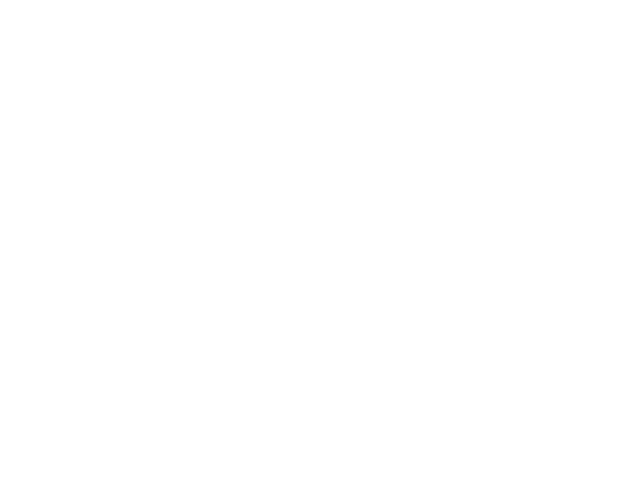

In [6]:
%matplotlib notebook 

ch, plot = jarvis_vis(np.array(c))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Jarvis - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="jarvisd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#jarvis)

Liczba punktow otoczki: 4
Punkty otoczki:
array([[ 0.,  0.],
       [10.,  0.],
       [10., 10.],
       [ 0., 10.]])


<IPython.core.display.Javascript object>


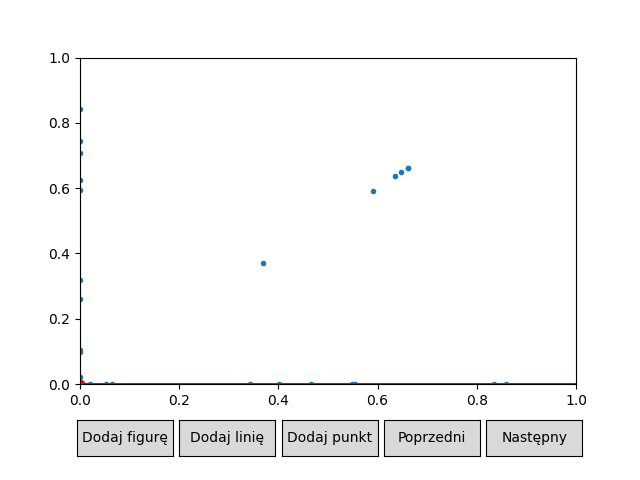

In [8]:
%matplotlib notebook

ch, plot = jarvis_vis(np.array(d))

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()



<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm Grahama

<a id="graham"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

<a id='section_id'></a>

### Graham - wizualizacja dla chmury punktów

<a id="grahama"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(70, -100),
 (97, -54),
 (97, 33),
 (94, 93),
 (-69, 100),
 (-89, 87),
 (-96, -48),
 (-92, -97)]


<IPython.core.display.Javascript object>


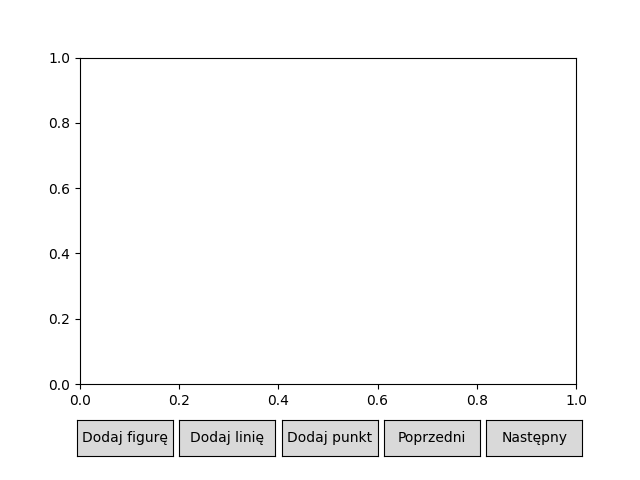

In [9]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()


<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie kołowym

<a id="grahamb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(3.9320754487815774, -99.92266400904796),
 (9.687827091536533, -99.529623762197),
 (21.08233393594208, -97.75241785149575),
 (22.57546518635576, -97.4184190572791),
 (26.824075086112774, -96.33519084828028),
 (41.209523042107776, -91.11407800467494),
 (45.82640679662356, -88.88160912196838),
 (56.26216992747059, -82.67144752000188),
 (62.738302583806984, -77.87108185265362),
 (63.552031522514376, -77.20841462794932),
 (70.22800308012663, -71.19008065297947),
 (71.77031704481782, -69.63491646642748),
 (77.02708608048668, -63.77168658542202),
 (79.86736304499786, -60.1764432335321),
 (81.88709722670393, -57.397763961537194),
 (86.38943830637209, -50.367300395291515),
 (92.92562139686412, -36.94359062146867),
 (96.49299869332457, -26.2507371928878),
 (98.23776066708693, -18.69070301289244),
 (99.17926970437217, -12.785634943459142),
 (99.64372726113454, -8.43371907930497),
 (99.68194099025554, -7.969356336318014),
 (99.85817882100191, -5.323919

<IPython.core.display.Javascript object>


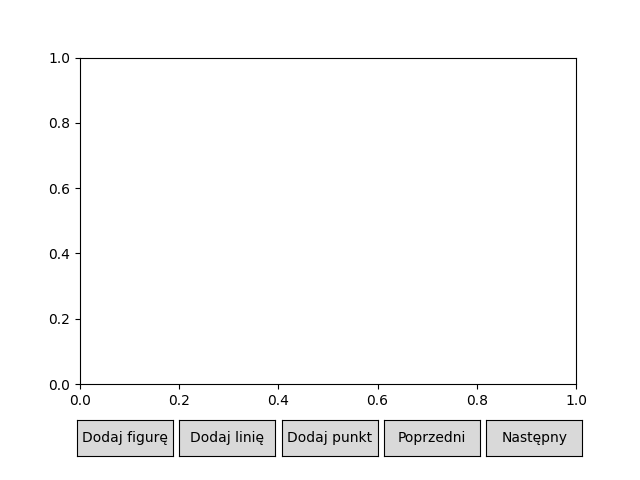

In [10]:
%matplotlib notebook

# przekazujemy kopię listy punktów, poinieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)


plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="grahamac"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-98.59823460704015, -100.0),
 (79.79040374377996, -100.0),
 (100.0, -97.6075856665461),
 (100.0, 96.22282588729394),
 (95.96401106490555, 100.0),
 (-89.22858512691971, 100.0),
 (-100.0, 96.45124885415373),
 (-100.0, -91.98620434998725)]


<IPython.core.display.Javascript object>


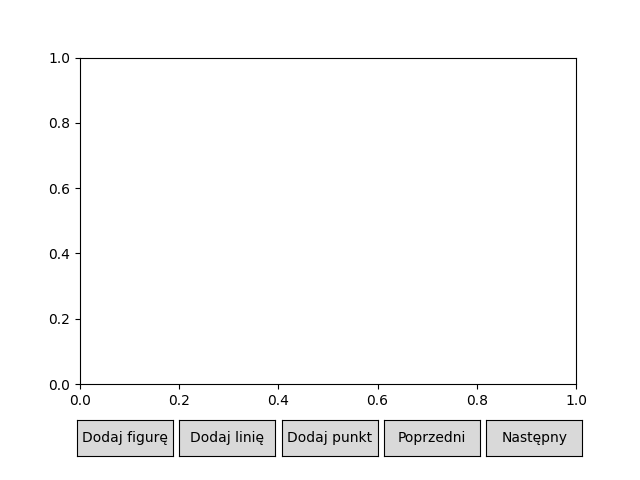

In [11]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot=graham_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Graham - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="grahamd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#graham)
            

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (10, 0), (10, 10), (0, 10)]


<IPython.core.display.Javascript object>


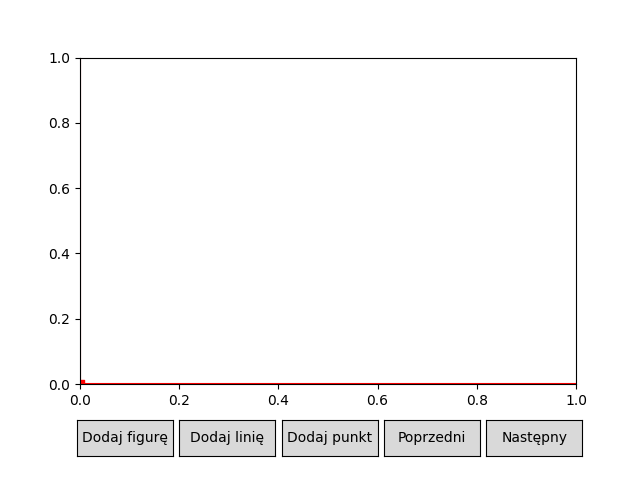

In [13]:
%matplotlib notebook

# przekazujemy kopię listy punktów, ponieważ algorytm sortujący modyfikuje listę w miejscu
ch, plot = graham_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm gorna - dolna

<a id="goradol"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla chmury punktów

<a id="goradola"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-96, -48),
 (-89, 87),
 (-69, 100),
 (94, 93),
 (97, 33),
 (97, -54),
 (70, -100),
 (-92, -97)]


<IPython.core.display.Javascript object>


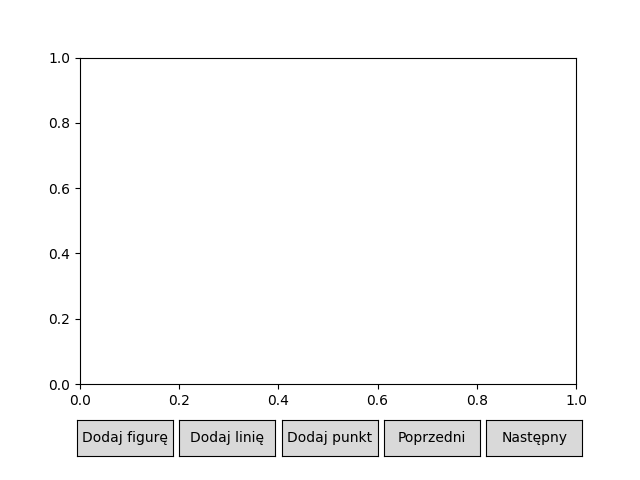

In [14]:
%matplotlib notebook

ch, plot = lower_upper_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie kołowym

<a id="goradolb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(-99.59085208993285, 9.036712898013153),
 (-99.49137488605925, 10.073049353677355),
 (-96.93429452174279, 24.571173060560717),
 (-96.28128939133359, 27.01690791231069),
 (-94.97249167745451, 31.30855832796894),
 (-94.81272589160679, 31.789102047762174),
 (-94.79442851349744, 31.84362295341761),
 (-93.80441269527277, 34.651582343306465),
 (-93.71196828924387, 34.90081660012772),
 (-92.76511579987508, 37.34478933714539),
 (-92.54126951534512, 37.896087350652145),
 (-92.41089265575167, 38.21291559888023),
 (-90.1990525977913, 43.1755823407268),
 (-88.91746420141754, 45.75679796477929),
 (-86.01606748216088, 51.00231499554059),
 (-83.33947140718043, 55.267825229257554),
 (-75.21838881237231, 65.89532596831724),
 (-72.08965747024439, 69.30426600017374),
 (-70.87168884997854, 70.54929992247851),
 (-68.77165583560134, 72.59792940318339),
 (-60.07091615826585, 79.94676373629262),
 (-59.86874964950968, 80.09826974039036),
 (-37.0958277277097, 92.8649

<IPython.core.display.Javascript object>


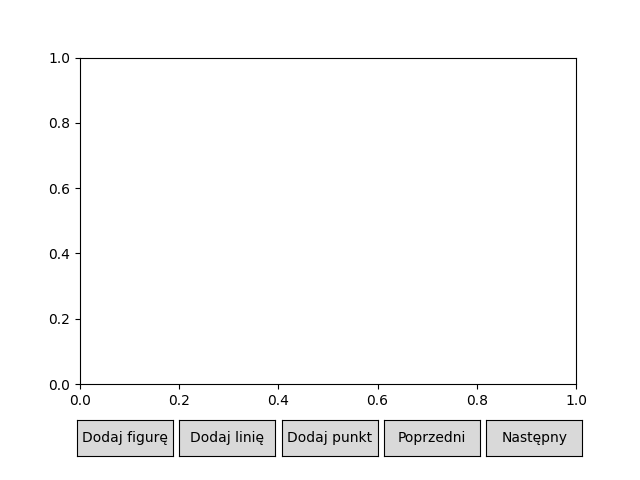

In [15]:
%matplotlib notebook

ch, plot = lower_upper_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="goradolc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(-100.0, -91.98620434998725),
 (-100.0, 96.45124885415373),
 (-89.22858512691971, 100.0),
 (95.96401106490555, 100.0),
 (100.0, 96.22282588729394),
 (100.0, -97.6075856665461),
 (79.79040374377996, -100.0),
 (-98.59823460704015, -100.0)]


<IPython.core.display.Javascript object>


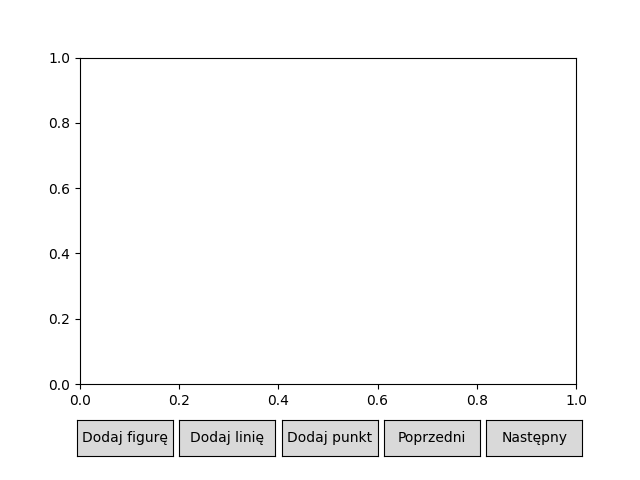

In [16]:
%matplotlib notebook

ch, plot = lower_upper_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Gorna-dolna - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="goradold"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#goradol)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[(0, 0), (0, 10), (10, 10), (10, 0)]


<IPython.core.display.Javascript object>


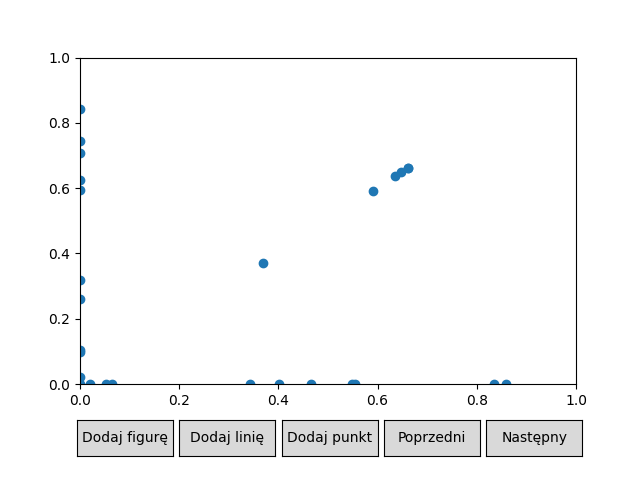

In [17]:
%matplotlib notebook

ch, plot = lower_upper_vis(d.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm przyrostowy

<a id="przyrost"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla chmury punktów

<a id="przyrosta"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:
[(70, -100),
 (97, -54),
 (97, 33),
 (94, 93),
 (-69, 100),
 (-89, 87),
 (-96, -48),
 (-92, -97)]


<IPython.core.display.Javascript object>


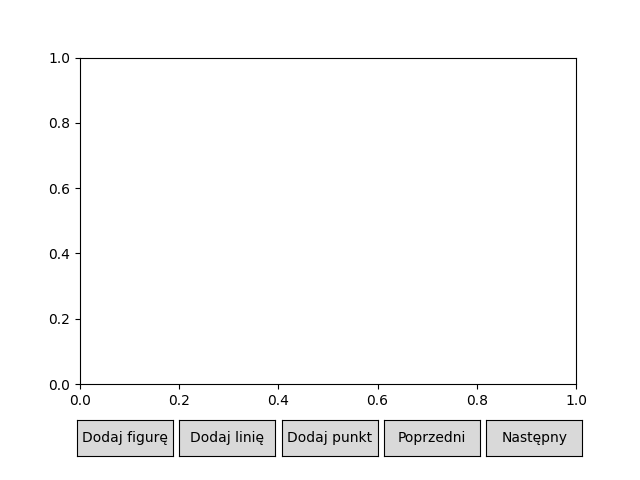

In [18]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(a.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy- wizualizacja dla punktów o rozkładzie kołowym

<a id="przyrostb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

Liczba punktow otoczki: 100
Punkty otoczki:
[(-99.59085208993285, 9.036712898013153),
 (-99.54515256061052, -9.526940835587094),
 (-99.08616187611777, -13.488236528908592),
 (-98.58874783979752, -16.740931855211066),
 (-97.885295644348, -20.456512327828193),
 (-96.33973651856083, -26.80774454396112),
 (-95.93351652206479, -28.22694471087373),
 (-95.33294787425372, -30.19319541891557),
 (-91.05147463717536, -41.34765974509093),
 (-90.25525517402507, -43.057971543857235),
 (-83.84688275513132, -54.49495620924256),
 (-83.40606358457342, -55.167277958279726),
 (-80.3685889851874, -59.50537710602308),
 (-79.26334169673677, -60.96985044320142),
 (-74.61911151599577, -66.57317925834238),
 (-66.43927955595396, -74.73835783642693),
 (-65.61180125981232, -75.46583025080218),
 (-61.5441853396014, -78.81822917881874),
 (-61.3165868297884, -78.99541872504392),
 (-61.070418064549706, -79.1858828164536),
 (-57.651871884876705, -81.70839411082416),
 (-49.339346657569614, -86.98062353998259),
 (-43.289

<IPython.core.display.Javascript object>


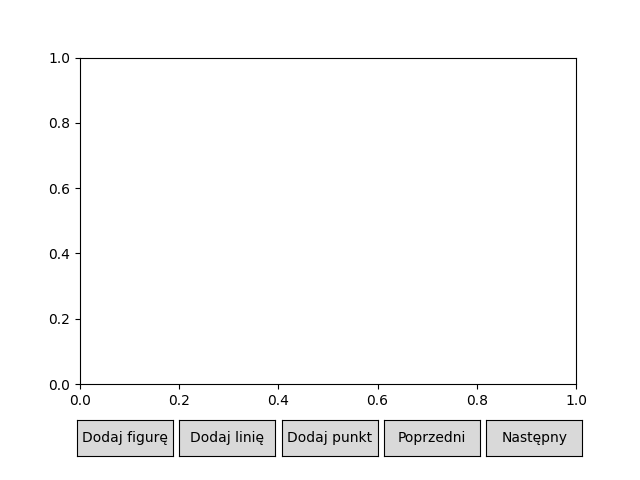

In [19]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [20]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

KeyboardInterrupt: 

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

d = makeDset(n=2)
print(d)
ch, plot = increase_with_sorting_vis(d.copy())

# print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(b.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="przyrostc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

In [ ]:
%matplotlib notebook

ch, plot = increase_with_sorting_vis(c.copy())

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Przyrostowy - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="przyrostd"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#przyrost)

<a id='section_id'></a>

[(0, 0), (10, 0), (10, 10), (0, 10), (3.3930724648399915, 0.0), (0.0, 6.6069275351600085), (5.918335499909297, 0.0), (0.0, 4.081664500090703), (0.8491655308619472, 0.8491655308619472), (9.150834469138053, 0.8491655308619472), (0.9338551817302865, 0.9338551817302865), (9.066144818269713, 0.9338551817302865)]



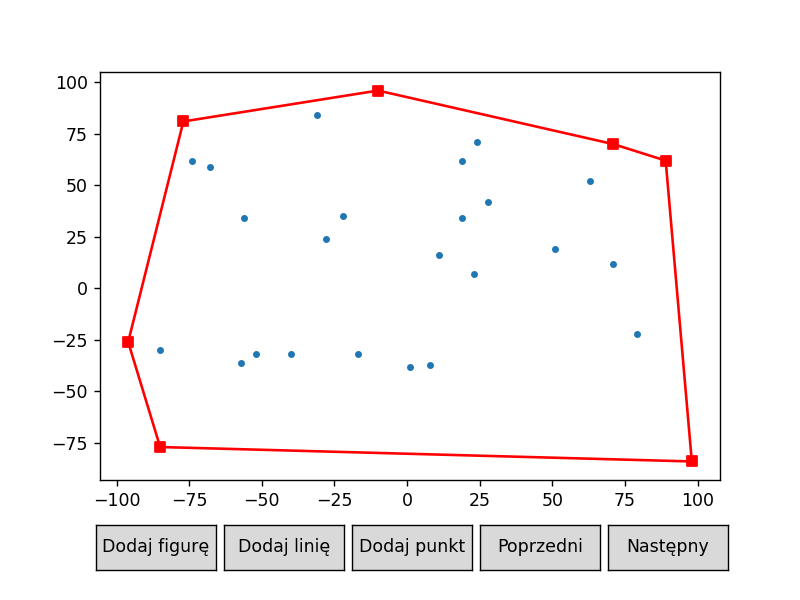

In [55]:
%matplotlib notebook

d = makeDset(n=2)
print(d)
ch, plot = increase_with_sorting_vis(d.copy())

# print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm dziel i zwyciezaj

<a id="dziel"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla chmury punktów

<a id="dziela"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 9
Punkty otoczki:
[(-100, 99),
 array([-100,  -72]),
 (-97, -99),
 (-73, -100),
 (79, -100),
 (98, -96),
 (99, -31),
 (99, 93),
 (82, 99)]


<IPython.core.display.Javascript object>


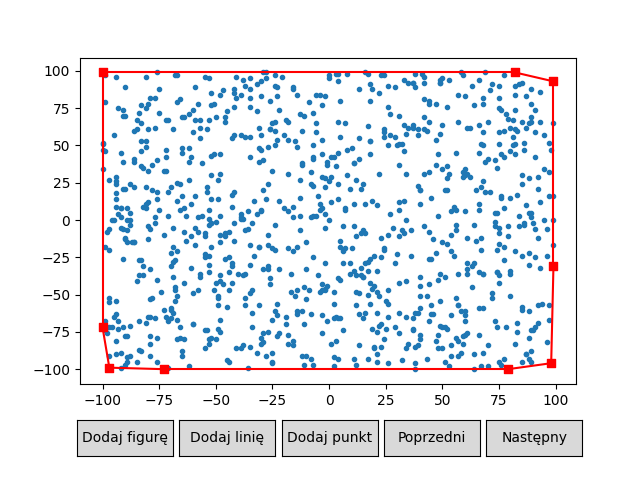

In [22]:
%matplotlib notebook

k = 3 

a = makeAset(n=1000)
ch, plot = divide_conq_vis(a.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj - wizualizacja dla punktów o rozkładzie kołowym

<a id="dzielb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow  otoczki: 100
Punkty otoczki:
[array([-7.5619464 , 99.71367492]),
 array([-12.79850158,  99.17761016]),
 array([-14.30646714,  98.97133422]),
 array([-19.52050332,  98.0762456 ]),
 array([-21.20208662,  97.72651392]),
 array([-26.33582308,  96.46981094]),
 array([-33.07399362,  94.37219371]),
 array([-35.43474057,  93.51138519]),
 array([-42.02917528,  90.73890249]),
 array([-44.17781542,  89.71243294]),
 array([-46.16712517,  88.70511008]),
 array([-46.30875445,  88.63125443]),
 array([-53.81561607,  84.28451499]),
 array([-65.96909264,  75.15370128]),
 array([-75.41248277,  65.67311049]),
 array([-78.06397168,  62.49813057]),
 array([-82.20995862,  56.9343719 ]),
 array([-86.40308564,  50.34388535]),
 array([-87.67225902,  48.09963615]),
 array([-92.20441512,  38.70847236]),
 array([-93.07142997,  36.57470332]),
 array([-96.90537543,  24.68497949]),
 array([-99.43664409,  10.59970807]),
 array([-99.80202977,   6.28926495]),
 array([-99.846073  ,  -5.54632367]),
 array(

<IPython.core.display.Javascript object>


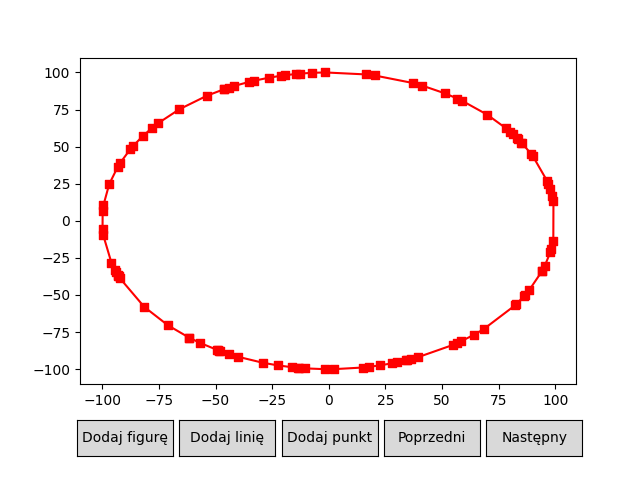

In [31]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(b.copy(), k)

print(f'Liczba punktow  otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="dzielc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 8
Punkty otoczki:


<IPython.core.display.Javascript object>


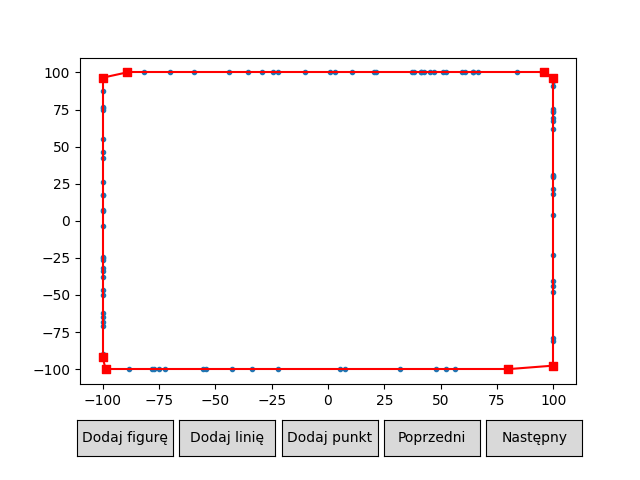

In [21]:
%matplotlib notebook

k = 5

ch, plot = divide_conq_vis(c.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
# pprint(ch)

plot.draw()


<a id='section_id'></a>

### Dziel i zwyciezaj  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="dzield"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#dziel)

<a id='section_id'></a>

Liczba punktow otoczki: 4
Punkty otoczki:
[array([ 0., 10.]), array([0., 0.]), array([10.,  0.]), array([10., 10.])]


<IPython.core.display.Javascript object>


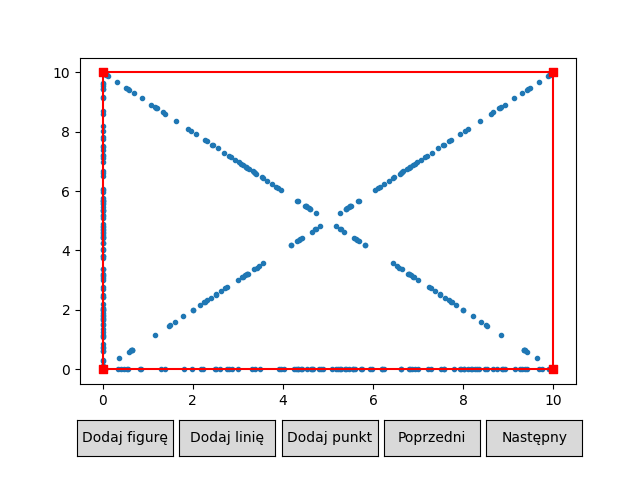

In [22]:
%matplotlib notebook

k = 5
ch, plot = divide_conq_vis(d.copy(), k)

print(f'Liczba punktow otoczki: {len(ch)}\nPunkty otoczki:')
pprint(ch)

plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm chana

<a id="chan"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

<a id='section_id'></a>

### Chan - wizualizacja dla chmury punktów

<a id="chana"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


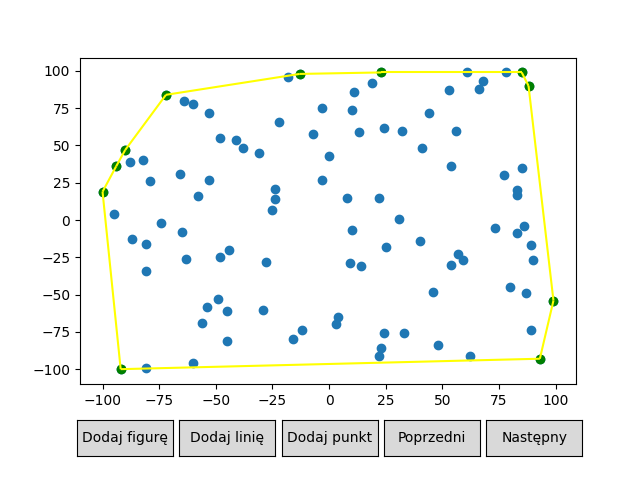

In [4]:
%matplotlib notebook
a = makeAset(n=100)
plot=chan(a,visual=True)
plot.draw()

<a id='section_id'></a>

### Chan  - wizualizacja dla punktów o rozkładzie kołowym

<a id="chanb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [5]:
%matplotlib notebook
plot=chan(b,visual=True)
plot.draw()

NameError: name 'b' is not defined

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="chanc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

In [100]:
%matplotlib notebook
print(len(c))
plot=chan(c,visual=True)
plot.draw()

10


TypeError: chan() got an unexpected keyword argument 'visual'

<a id='section_id'></a>

### Chan   - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="chand"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#chan)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


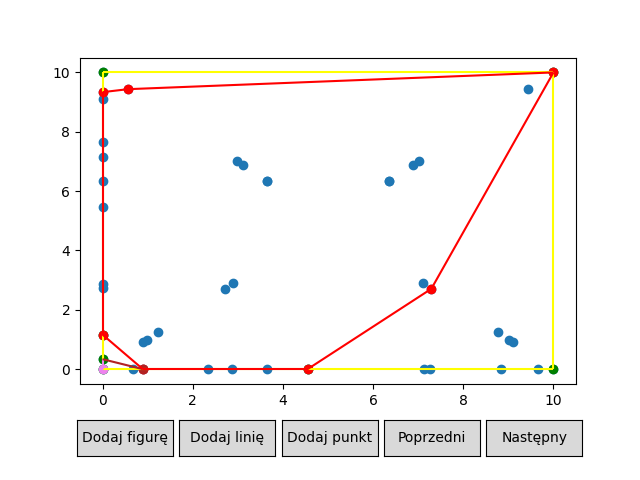

In [28]:
%matplotlib notebook
plot=chan(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

## Algorytm QuickHull

<a id="quickhull"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

<a id='section_id'></a>

### Kod

<a id='section_id'></a>

In [29]:
def furthest(a, b, considering):
    n = len(considering)
    i = 0
    ans = None
    while i < n:
        if det(a, b, considering[i]) < 0:  # rozwazany wierzcholek jest po prawej stronie ab
            if ans == None or det(a, b, considering[i]) < det(a, b,
                                                              ans):  # |det(a,b,c)| = 1/2|ab|*h, gdzie h jest wysokoscia z c na ab
                ans = considering[i]
        i += 1
    return ans


def insideTriangle(a, b, c, i):
    if det(a, b, i) >= 0 and det(b, c, i) >= 0 and det(c, a, i) >= 0:
        return True
    return False


def removeInner(a, b, c, considering):
    new=[]
    for i in considering:
        if not insideTriangle(a, b, c, i):
            new.append(i)
    considering.clear()
    considering+=new

def quickHullUtil(a, b, considering,plot=None,hull=None):     
    if len(considering) == 0:
        return []
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
        
    c = furthest(a, b, considering)
    if c == None:
        return []
    considering.remove(c)
    
    if plot!=None :
        hull.append(c)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green'),
                                    PointsCollection([c],color='red')],
                           lines=[LinesCollection([[a,b]],color='yellow')]))
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,c],[b,c]],color='yellow')]))

    removeInner(a, c, b, considering)
    
    if plot!=None :
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[a,b],[a,c],[b,c]],color='yellow')]))
    
        z=quickHullUtil(a, c, considering,plot,hull)
        
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection(deepcopy(hull),color='green')],
                           lines = [LinesCollection([[b,c]],color='yellow')]))
        
        return z +[c]+ quickHullUtil(c, b, considering,plot,hull)
    
    return quickHullUtil(a, c, considering) +[c]+ quickHullUtil(c, b, considering)


def quickHull(points,visual=False):
    a = min(points, key=lambda x: x[0])
    b = max(points, key=lambda x: x[0])

    considering = deepcopy(points)
    
    if visual==True:
        plot=Plot(scenes=[Scene(points=[PointsCollection(deepcopy(considering))])])
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(considering)),
                                     PointsCollection([a,b],color='red')]))

    considering.remove(a)
    considering.remove(b)
    
    
    if visual:
        hull=[a,b]
        hoax =[a]+quickHullUtil(a, b, considering,plot,hull) +[b] + quickHullUtil(b, a, considering,plot,hull)
        plot.add_scene(Scene(points=[PointsCollection(deepcopy(points)),PointsCollection(deepcopy(hoax),color='green')],
                           lines=[LinesCollection(makeFullSheaf(hoax),color='yellow')]))
        return plot
    
    return [a]+quickHullUtil(a, b, considering)+[b]+  quickHullUtil(b, a, considering)

<a id='section_id'></a>

### QuickHull - wizualizacja dla chmury punktów

<a id="quickhulla"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


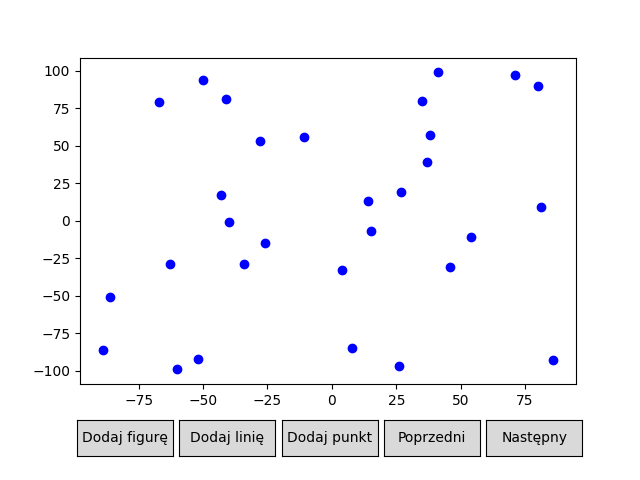

In [4]:
%matplotlib notebook
plot=quickHull(a,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull - wizualizacja dla punktów o rozkładzie kołowym

<a id="quickhullb"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


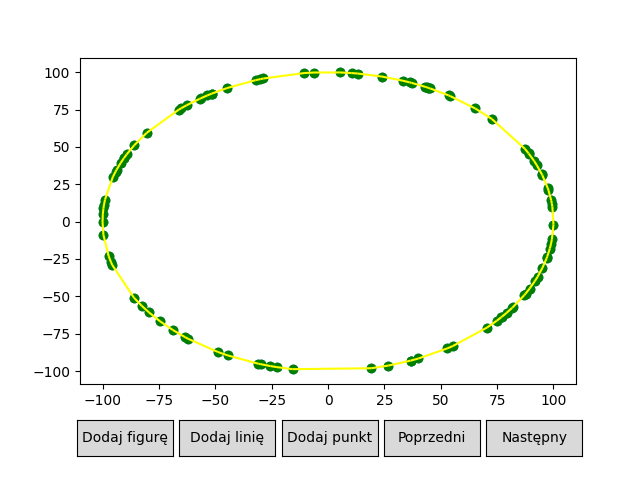

In [5]:
%matplotlib notebook
plot=quickHull(b,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie prostokątnym

<a id="quickhullc"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


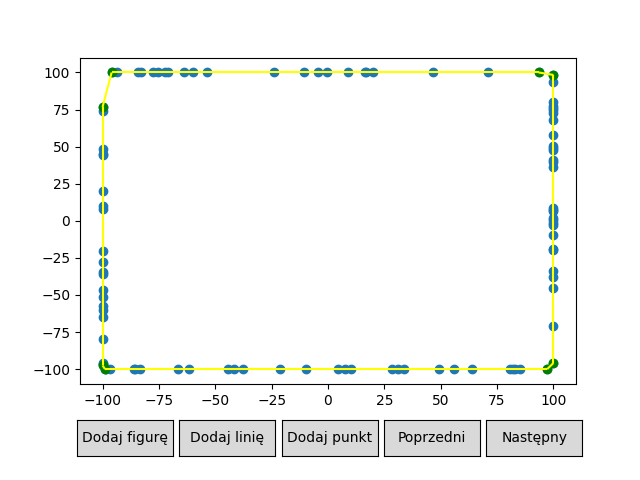

In [6]:
%matplotlib notebook
plot=quickHull(c,visual=True)
plot.draw()

<a id='section_id'></a>

### QuickHull  - wizualizacja dla punktów o rozkładzie na dwóh bokach, wierzchołkach i przekątnych prostokąta

<a id="quickhulld"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)

[Poczatek sekcji](#quickhull)

<a id='section_id'></a>

<IPython.core.display.Javascript object>


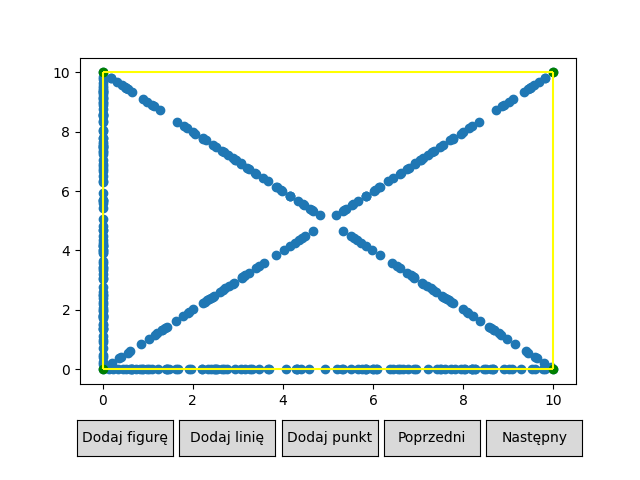

In [7]:
%matplotlib notebook
plot=quickHull(d,visual=True)
plot.draw()

<a id='section_id'></a>

<a id='section_id'></a>

<a id='section_id'></a>

# Sekcja pomiarów czasu

<a id="pomiary"></a>


### Funkcja do pomiaru czasów i wizualizacji wyników

<a id='section_id'></a>

In [8]:
import time


from pure.graham import *
from pure.jarvis import *
from pure.divide_conq import *
from pure.chan import *
from pure.increase import *
from pure.lowerupper import *
from pure.quickhull import *

from lib.timemeasure import *

def generate_plot(xdatas, ydatas, xlabel, ylabel, title):
    for xdata, ydata in zip(xdatas, ydatas):
        plt.plot(xdata, ydata, ls = '--')
        plt.scatter(xdata, ydata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

<a id='section_id'></a>

<a id='section_id'></a>

## Zredefiniowane kody funkcji funkcji wyznaczających otoczkę bez wizualizacji - wizualizacja mogła by wpływać na korzyść niektórych i niekorzyść innych. Przed uruchomieniem pomiarów czasu uruchomić komórki z nowymi definicjami.

<a id="jarvis"></a>
[spis treści](#spis)

[Wybor zbiorow do wizualizcji](#ustalenieZbiorow)


<a id='section_id'></a>

<a id='section_id'></a>

## Pomiary

<a id='section_id'></a>

<a id='section_id'></a>

### Chmura punktów

<a id='section_id'></a>

In [9]:


#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 100 for i in range(10) ]

funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_a = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeAset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_a[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_a[fi][i] = avg_exec_time(func, points=points.copy())
        
#         print(exectimes_a[fi][i])
        
    

    
pprint(exectimes_a)


<function graham at 0x7f4bd16ca040> 1000
<function lower_upper at 0x7f4bcd0a5790> 1000
<function chan at 0x7f4bcd0f5ee0> 1000
<function quickHull at 0x7f4bcd0a5af0> 1000
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 1000
<function graham at 0x7f4bd16ca040> 1100
<function lower_upper at 0x7f4bcd0a5790> 1100
<function chan at 0x7f4bcd0f5ee0> 1100
<function quickHull at 0x7f4bcd0a5af0> 1100
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 1100
<function graham at 0x7f4bd16ca040> 1200
<function lower_upper at 0x7f4bcd0a5790> 1200
<function chan at 0x7f4bcd0f5ee0> 1200
<function quickHull at 0x7f4bcd0a5af0> 1200
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 1200
<function graham at 0x7f4bd16ca040> 1300
<function lower_upper at 0x7f4bcd0a5790> 1300
<function chan at 0x7f4bcd0f5ee0> 1300
<function quickHull at 0x7f4bcd0a5af0> 1300
<function jarvis at 0x7f4b

### Algorytm Grahama

<IPython.core.display.Javascript object>


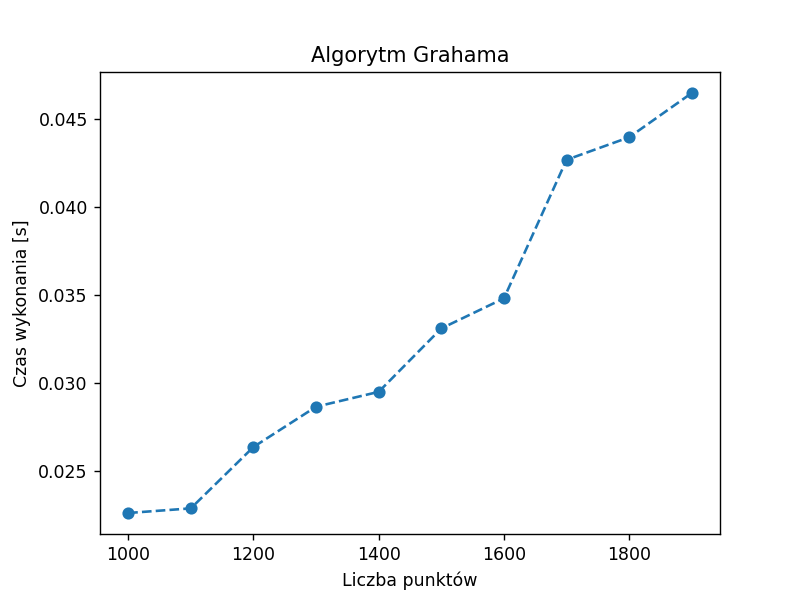

In [11]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algorytm "górna-dolna"

<IPython.core.display.Javascript object>


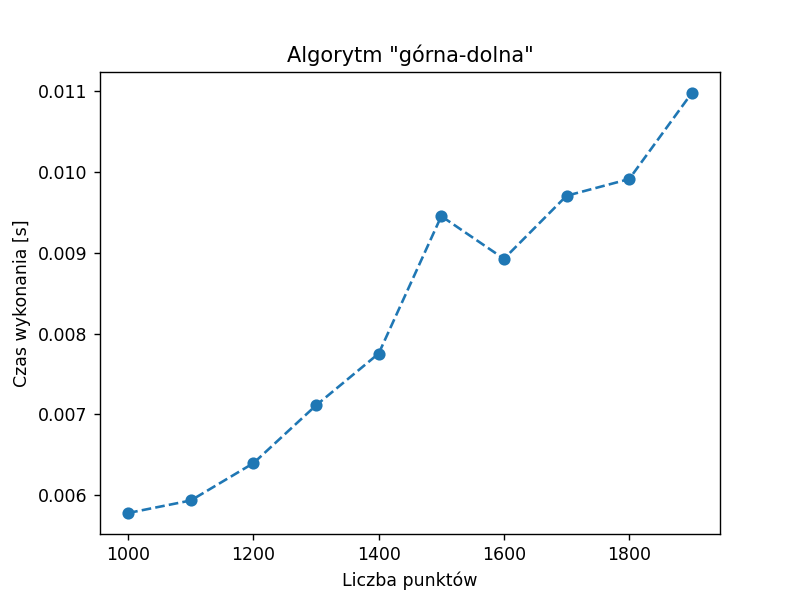

In [12]:
%matplotlib notebook


generate_plot([ns], [exectimes_a[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

<IPython.core.display.Javascript object>


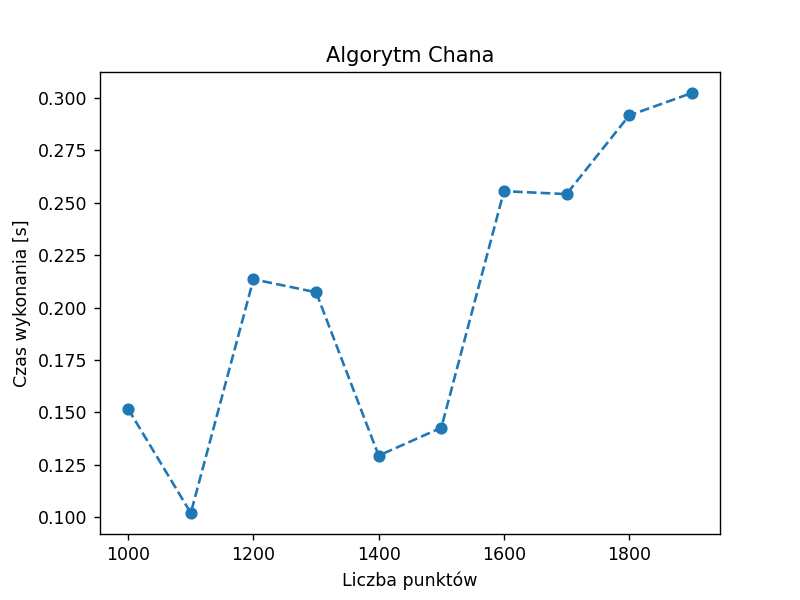

In [13]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

In [ ]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

<IPython.core.display.Javascript object>


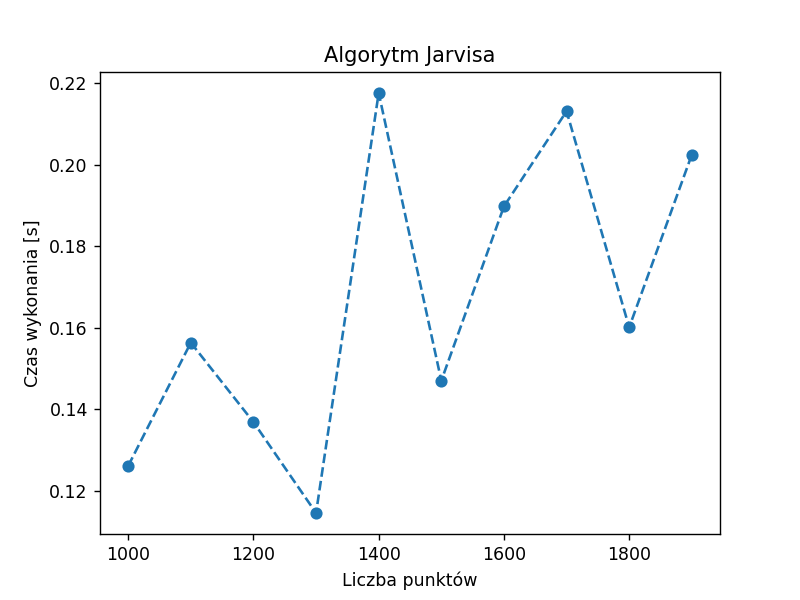

In [15]:
%matplotlib notebook

generate_plot([ns], [exectimes_a[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Zbiorczy

In [ ]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_a))], exectimes_a, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

<a id='section_id'></a>

### Rozkład kołowy

<a id='section_id'></a>

In [18]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 100 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, quickHull, jarvis]

exectimes_b = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeBset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_b[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_b[fi][i] = avg_exec_time(func, points=points.copy())
        
    
pprint(exectimes_b)

<function graham at 0x7f4bd16ca040> 100
<function lower_upper at 0x7f4bcd0a5790> 100
<function chan at 0x7f4bcd0f5ee0> 100
<function quickHull at 0x7f4bcd0a5af0> 100
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 100
<function graham at 0x7f4bd16ca040> 200
<function lower_upper at 0x7f4bcd0a5790> 200
<function chan at 0x7f4bcd0f5ee0> 200
<function quickHull at 0x7f4bcd0a5af0> 200
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 200
<function graham at 0x7f4bd16ca040> 300
<function lower_upper at 0x7f4bcd0a5790> 300
<function chan at 0x7f4bcd0f5ee0> 300
<function quickHull at 0x7f4bcd0a5af0> 300
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 300
<function graham at 0x7f4bd16ca040> 400
<function lower_upper at 0x7f4bcd0a5790> 400
<function chan at 0x7f4bcd0f5ee0> 400
<function quickHull at 0x7f4bcd0a5af0> 400
<function jarvis at 0x7f4bd1997790> zmieniam 

<a id='section_id'></a>

### Algorytm Grahama

<IPython.core.display.Javascript object>


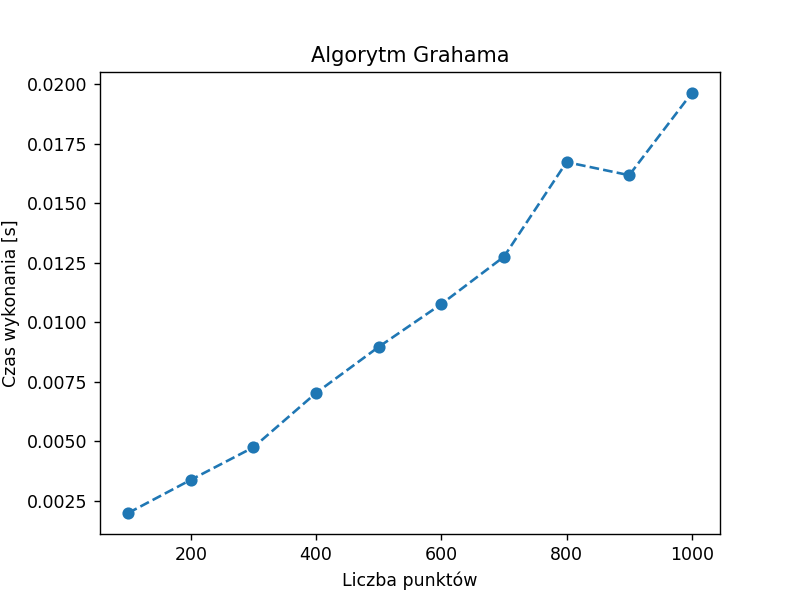

In [19]:
%matplotlib notebook


generate_plot([ns], [exectimes_b[0]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Grahama')

plt.show()

### Algortym "górna-dolna"

<IPython.core.display.Javascript object>


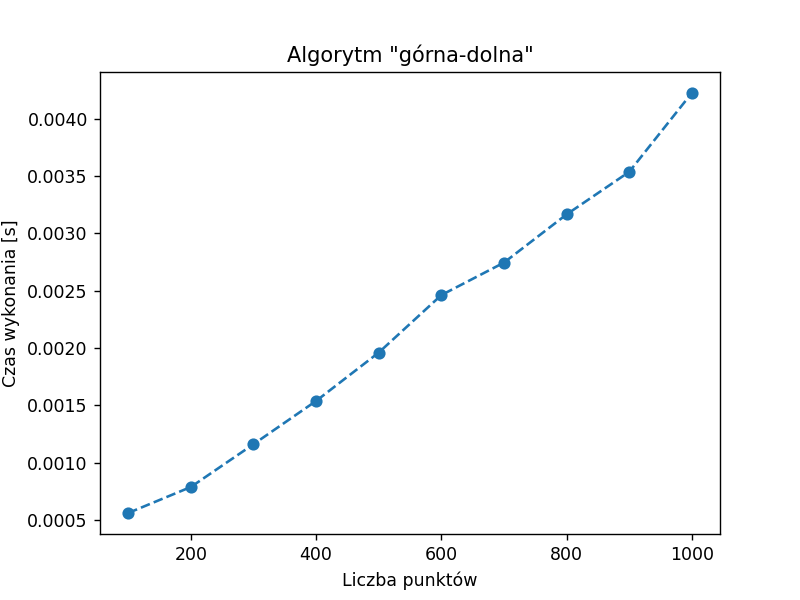

In [20]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[1]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm "górna-dolna"')

plt.show()

### Algorytm Chana

<IPython.core.display.Javascript object>


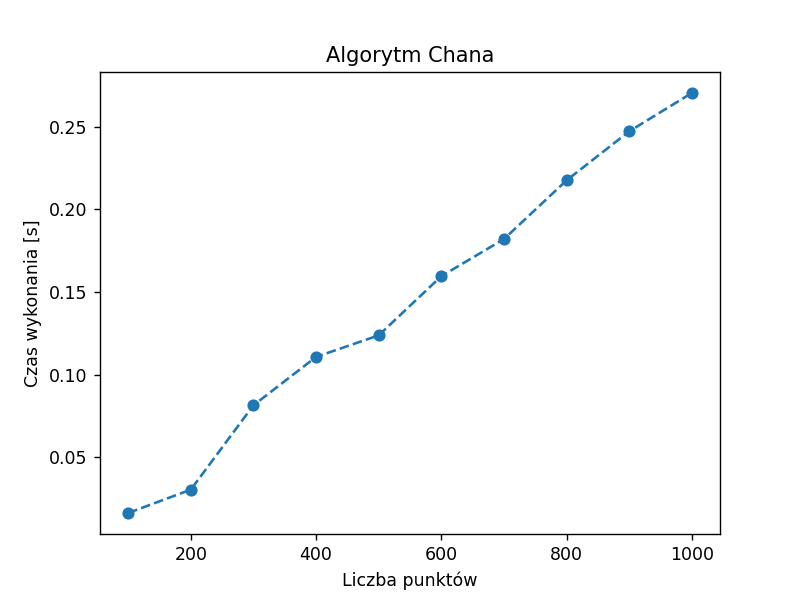

In [21]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[2]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Chana')

plt.show()

### Algorytm QuickHull

<IPython.core.display.Javascript object>


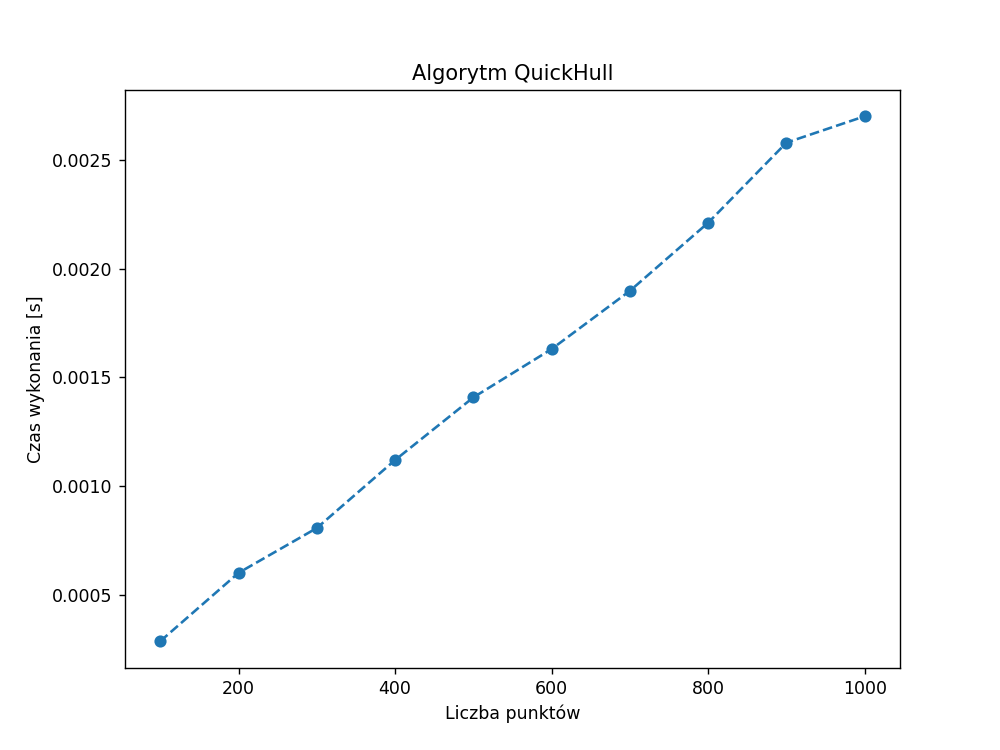

In [22]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[3]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm QuickHull')

plt.show()

### Algorytm Jarvisa

<IPython.core.display.Javascript object>


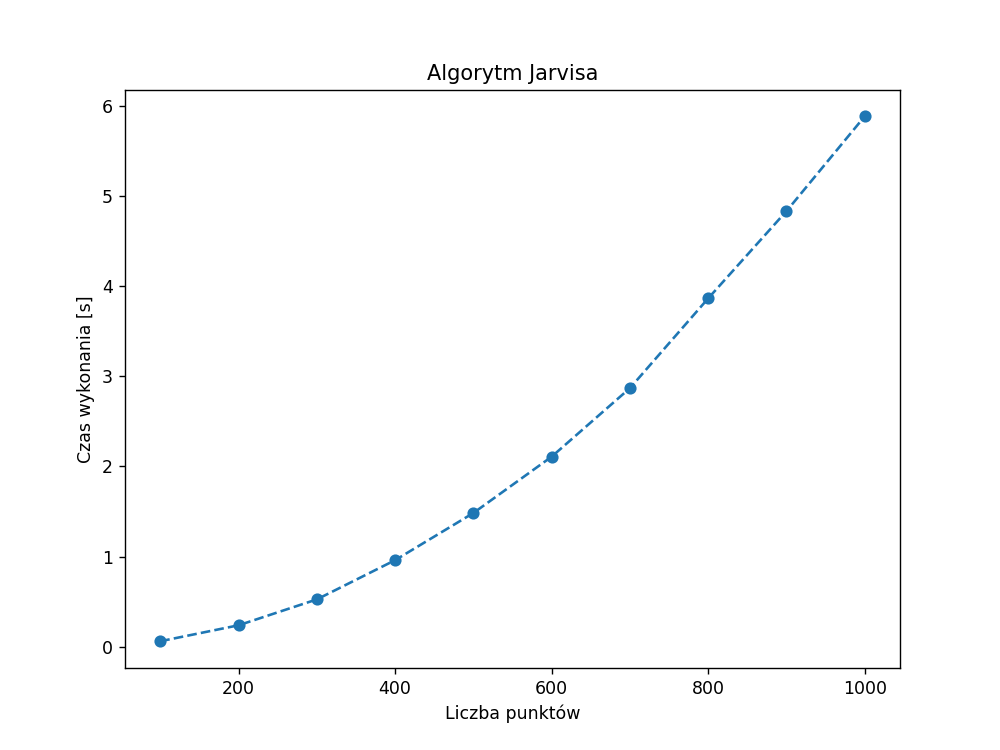

In [23]:
%matplotlib notebook

generate_plot([ns], [exectimes_b[4]], 'Liczba punktów', 'Czas wykonania [s]', 'Algorytm Jarvisa')

plt.show()

### Ujęcie zbiorcze

<IPython.core.display.Javascript object>


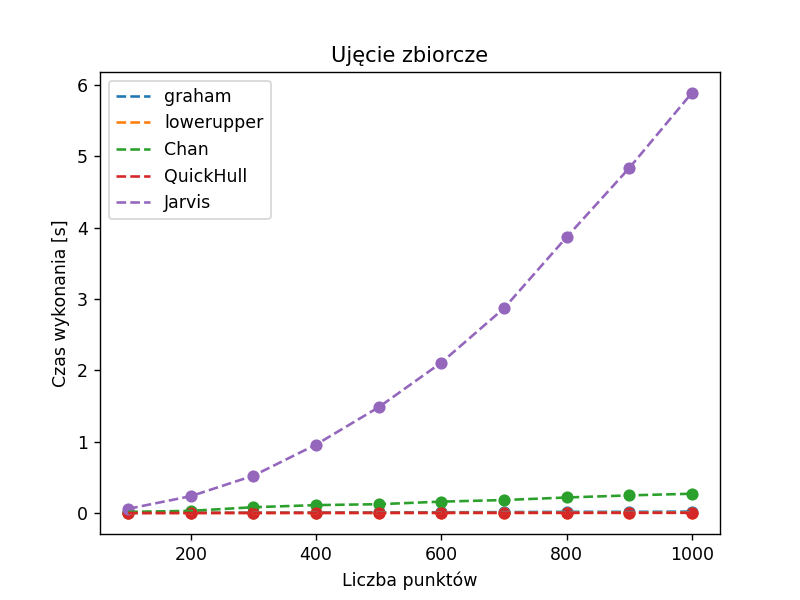

In [24]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b))], exectimes_b, 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull', 'Jarvis'))
plt.show()

### Ujęcie zbiorcze bez algorytmu Jarvisa

<IPython.core.display.Javascript object>


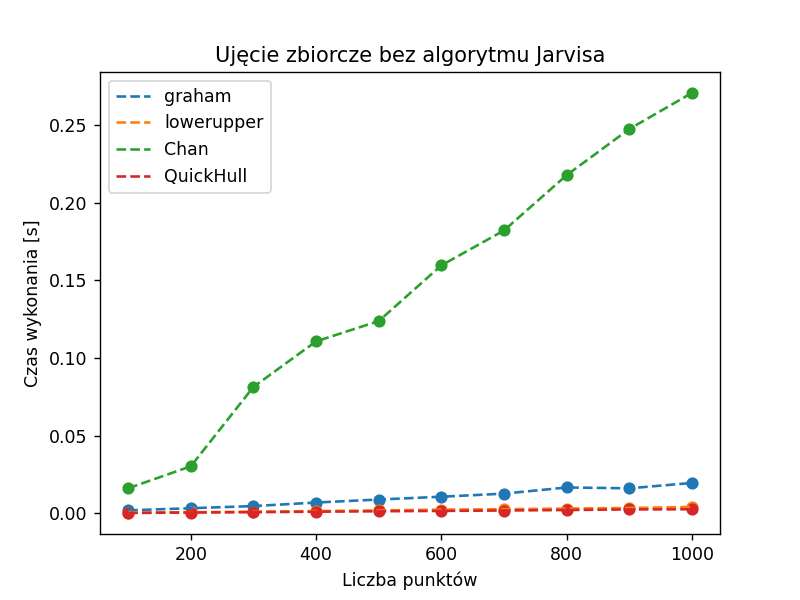

In [25]:
%matplotlib notebook

generate_plot([ns for _ in range(len(exectimes_b) - 1)], exectimes_b[:len(exectimes_b)-1], 'Liczba punktów', 'Czas wykonania [s]', 'Ujęcie zbiorcze bez algorytmu Jarvisa')
plt.legend(labels=('graham', 'lowerupper', 'Chan', 'QuickHull'))
plt.show()

### Losowy rozkład na prostokącie

<a id='section_id'></a>

In [26]:
#lista liczb punktów na których ma być testowany algorytm 
ns = [ 1000 + i * 100 for i in range(10) ]
funcs = [graham, lower_upper, chan, jarvis]

exectimes_c = np.zeros(shape=(len(funcs), len(ns)))


for i, n in enumerate(ns):
    points = makeCset(n = n)
    for fi, func in enumerate(funcs):
        if func is jarvis:
            print(func, 'zmieniam na np.array')
            points = np.array(points)
        if func is increase_with_sorting: 
            continue
        if func is divide_conq:
            exectimes_c[fi][i] = avg_exec_time(func, 5, points=points)
            continue
        
        print(func, n)
        exectimes_c[fi][i] = avg_exec_time(func, points=points.copy())
        
    
pprint(exectimes_c)

<function graham at 0x7f4bd16ca040> 1000
<function lower_upper at 0x7f4bcd0a5790> 1000
<function chan at 0x7f4bcd0f5ee0> 1000
<function jarvis at 0x7f4bd1997790> zmieniam na np.array
<function jarvis at 0x7f4bd1997790> 1000
<function graham at 0x7f4bd16ca040> 1100
<function lower_upper at 0x7f4bcd0a5790> 1100
<function chan at 0x7f4bcd0f5ee0> 1100


KeyboardInterrupt: 

<a id='section_id'></a>

### Wierzchołki kwadratu, jego przekątne i dwa boki o wspólnym wierzchołku

<a id='section_id'></a>

<a id='section_id'></a>